In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle
import re
import matplotlib.ticker as mtick
import matplotlib as mpl
from datetime import datetime
import time

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

[user]	[check-in time]		[latitude]	[longitude]	[location id]


196514  2010-07-24T13:45:06Z    53.3648119      -2.2723465833   145064

In [11]:
timeslice = 1453460000
points = {}
with open(data_path + "/real/gowalla/loc-gowalla_totalCheckins.txt","r",encoding = "ISO-8859-1") as f:
    for line in f:
        try:
            checkin = line.split("\t")
            uid = int(checkin[0])
            timestamp = checkin[1]
            lat = float(checkin[2])
            lon = float(checkin[3])
            dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ')
            utime = time.mktime(dt.timetuple())
            entry = {'time': utime, 'lat': lat, 'lon': lon}
            if utime <= timeslice:
                if uid in points:
                    if utime > points[uid]['time']:
                        points[uid] = entry
                else:
                    points[uid] = entry
        except:
            print(line)
            break

In [12]:
len(points)

107092

In [14]:
all_lats = [points[u]['lat'] for u in points]
all_lon = [points[u]['lon'] for u in points]

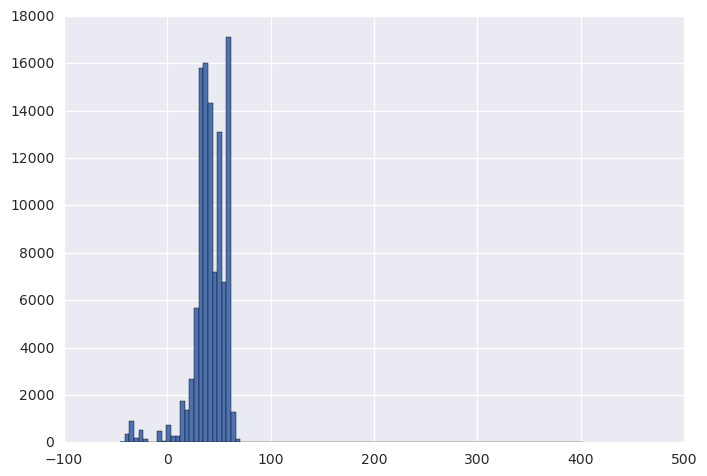

In [17]:
pd.Series(all_lats).hist(bins=100)

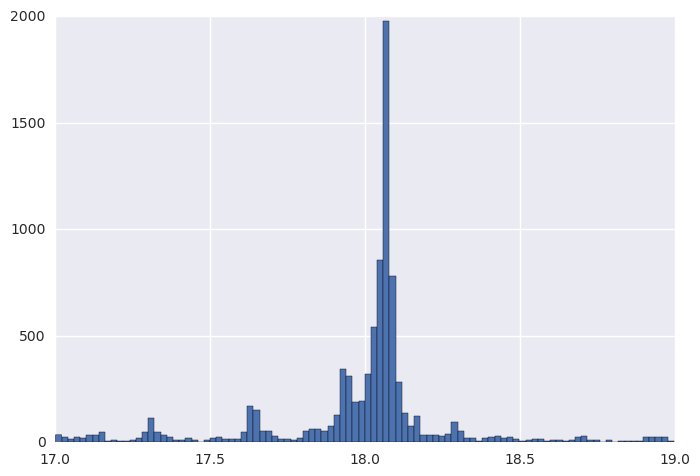

In [23]:
pd.Series([lon for lon in all_lon if lon > 17 and lon < 19]).hist(bins=100)

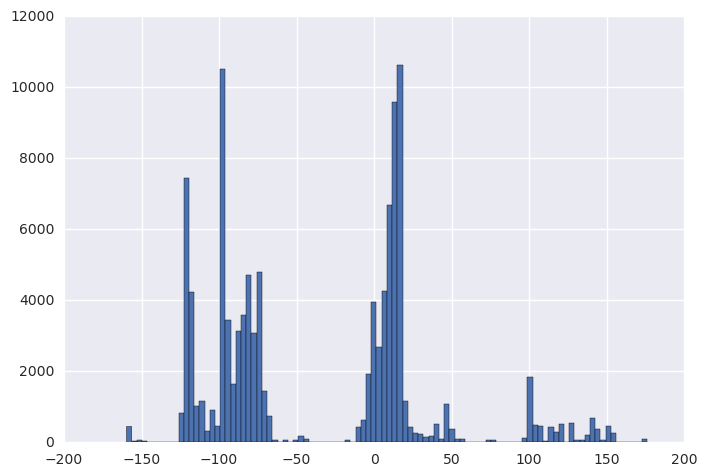

In [20]:
pd.Series(all_lon).hist(bins=100)

In [24]:
for k in points:
    if points[k]['lon'] > 17 and points[k]['lon'] < 19:
        print(points[k])

{'time': 1287557931.0, 'lat': -34.10239541, 'lon': 18.48001921}
{'time': 1287591598.0, 'lat': 59.3300839389, 'lon': 18.076917344}
{'time': 1287511566.0, 'lat': 59.3420120167, 'lon': 17.9674315667}
{'time': 1287679666.0, 'lat': -33.929970971, 'lon': 18.411121056}
{'time': 1287589324.0, 'lat': 59.2899042463, 'lon': 17.9864215851}
{'time': 1287601213.0, 'lat': 59.40404146, 'lon': 17.66480308}
{'time': 1287722342.0, 'lat': -33.97905087, 'lon': 18.47317415}
{'time': 1287342461.0, 'lat': 60.640797464, 'lon': 17.3935997486}
{'time': 1287515675.0, 'lat': 59.83995687, 'lon': 17.59981477}
{'time': 1287559654.0, 'lat': 62.4407602961, 'lon': 17.3416292667}
{'time': 1287598679.0, 'lat': 59.3607218, 'lon': 18.1288599}
{'time': 1287726532.0, 'lat': 59.30480575, 'lon': 18.20903152}
{'time': 1287465973.0, 'lat': 59.49930977, 'lon': 17.60877352}
{'time': 1287560287.0, 'lat': 59.361398267, 'lon': 17.872480233}
{'time': 1287579121.0, 'lat': 59.2740998, 'lon': 17.9187003}
{'time': 1287471073.0, 'lat': 59.8

In [ ]:
for k in points:
    if points[k]['lon'] > 17 and points[k]['lon'] < 19: